
=== Matriz de Correlación Original ===


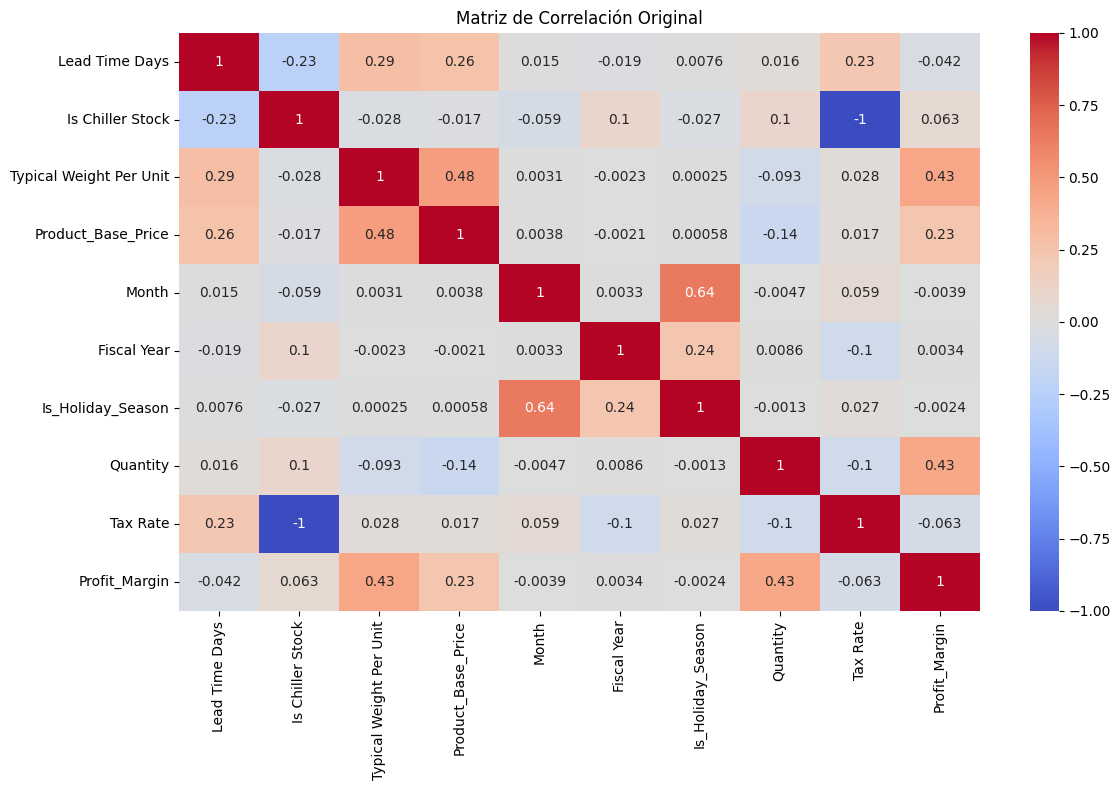

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Mostrar la matriz de correlación original
print("\n=== Matriz de Correlación Original ===")
df = pd.read_csv('order_profitability.csv')
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix_original = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación Original')
plt.tight_layout()
plt.show()


In [15]:
print("=== Informacion basica del dataset ===")
df.info()

=== Informacion basica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231412 entries, 0 to 231411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Lead Time Days           231412 non-null  int64  
 1   Is Chiller Stock         231412 non-null  int64  
 2   Typical Weight Per Unit  231412 non-null  float64
 3   Product_Base_Price       231412 non-null  float64
 4   Buying Group             145943 non-null  object 
 5   Customer_Category        145943 non-null  object 
 6   Sales Territory          231412 non-null  object 
 7   Continent                231412 non-null  object 
 8   Country                  231412 non-null  object 
 9   Month                    231412 non-null  int64  
 10  Fiscal Year              231412 non-null  int64  
 11  Is_Holiday_Season        231412 non-null  int64  
 12  Quantity                 231412 non-null  int64  
 13  Package             

In [16]:
# Eliminar características altamente correlacionadas
features_to_remove = ['Is Chiller Stock', 'Tax Rate', 'Profit_Margin']
df_processed = df.drop(columns=features_to_remove)
    
print(f"\nCaracterísticas eliminadas: {', '.join(features_to_remove)}")


Características eliminadas: Is Chiller Stock, Tax Rate, Profit_Margin



=== Matriz de Correlación después de eliminar características ===


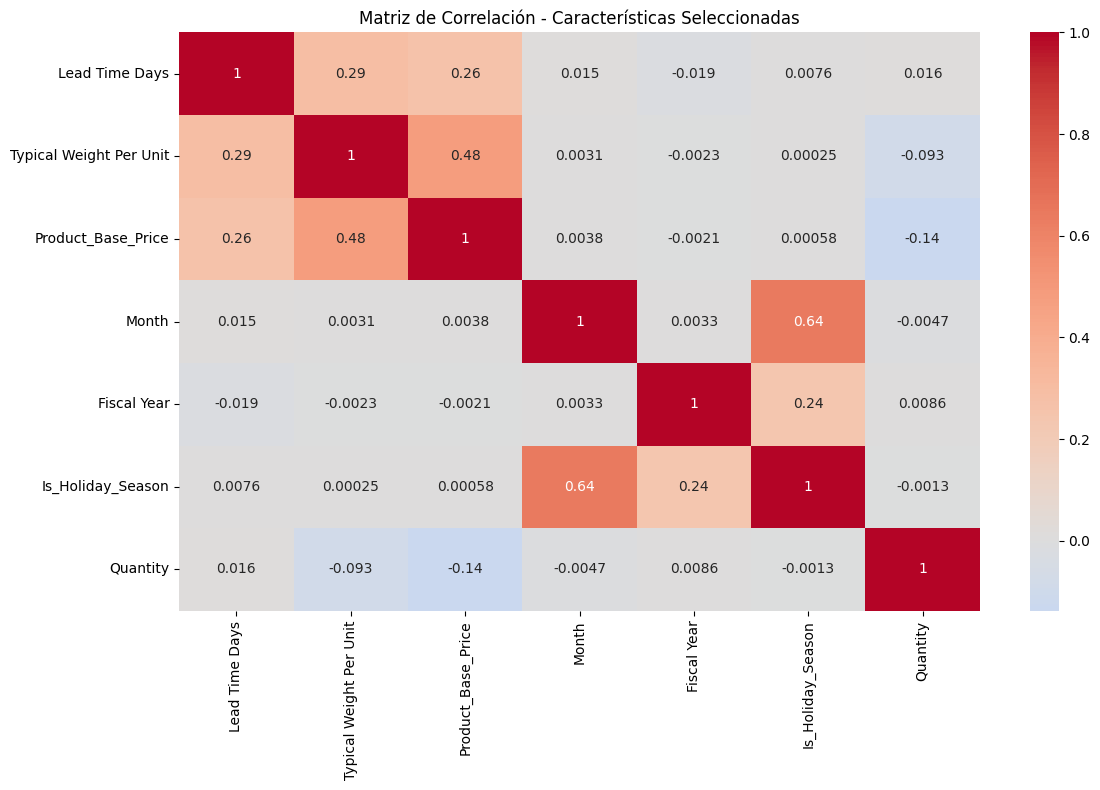

In [17]:
# Mostrar nueva matriz de correlación
print("\n=== Matriz de Correlación después de eliminar características ===")
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
correlation_matrix_new = df_processed[numerical_cols].corr()
    
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Características Seleccionadas')
plt.tight_layout()
plt.show()

In [18]:
print("=== Analisis de datos despues del eliminado de caracteristicas correlacionadas")
df_processed.info()

=== Analisis de datos despues del eliminado de caracteristicas correlacionadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231412 entries, 0 to 231411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Lead Time Days           231412 non-null  int64  
 1   Typical Weight Per Unit  231412 non-null  float64
 2   Product_Base_Price       231412 non-null  float64
 3   Buying Group             145943 non-null  object 
 4   Customer_Category        145943 non-null  object 
 5   Sales Territory          231412 non-null  object 
 6   Continent                231412 non-null  object 
 7   Country                  231412 non-null  object 
 8   Month                    231412 non-null  int64  
 9   Fiscal Year              231412 non-null  int64  
 10  Is_Holiday_Season        231412 non-null  int64  
 11  Quantity                 231412 non-null  int64  
 12  Package                  231412 non

In [19]:
# Guardar el nuevo dataset
import os
save_path='./remove_correlated_data.csv'

os.makedirs(os.path.dirname(save_path), exist_ok=True)
df_processed.to_csv(save_path, index=False)
print(f"\nDatos procesados guardados en: {save_path}")


Datos procesados guardados en: ./remove_correlated_data.csv


In [20]:
print("\n=== Resumen del proceso ===")
print(f"Características originales: {len(df.columns)}")
print(f"Características después de la selección: {len(df_processed.columns)}")
print("\n¡Proceso completado con éxito!")


=== Resumen del proceso ===
Características originales: 17
Características después de la selección: 14

¡Proceso completado con éxito!
